In [1]:
!pip install requests beautifulsoup4 lxml spacy
!python -m spacy download en_core_web_trf
!pip install transformers
!pip install torch torchvision torchaudio
!pip install tensorflow
!pip install requests beautifulsoup4 lxml spacy
!python -m spacy download en_core_web_sm
!pip install hf_xet
!pip install wordcloud matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.6/735.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

WordCloud and Matplotlib loaded successfully.
Pillow (PIL) library loaded successfully.
NumPy library loaded successfully.
English spaCy model (en_core_web_trf) loaded successfully.
Loading Zero-shot classification pipeline...


Device set to use cuda:0


Zero-shot classification pipeline loaded successfully.
Loading Summarization pipeline...


Device set to use cuda:0


Summarization pipeline loaded successfully.
Loading Text-to-Text Generation pipeline for titles...


Device set to use cuda:0


Text-to-Text Generation pipeline (for titles using t5-large) loaded successfully.
Loading NER pipeline (dslim/bert-base-NER)...


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


NER pipeline (dslim/bert-base-NER) loaded successfully.
Processing started: https://www.nbcnews.com/health/health-news/cost-weight-loss-drugs-wegovy-zepbound-how-low-prices-down-rcna205911

1. Fetching HTML content...

2. Extracting and cleaning text from HTML...
   Applying general boilerplate phrase cleaning...
   Final cleaned text (first 300 chars): 'As costs of weight loss drugs like Wegovy and Zepbound go down, how low can prices go? For an optimal experience visit our site on another browser. BREAKING: Trump administration seeks to end all remaining contracts with Harvard Skip to Content May 27, 2025, 5:00 AM EDT By Berkeley Lovelace Jr. List...'
   File saved successfully: processed_articles/cost-weight-loss-drugs-wegovy-zepbound-how-low-pri_cleaned_text.txt.txt

3. Tokenizing text with spaCy...
   File saved successfully: processed_articles/cost-weight-loss-drugs-wegovy-zepbound-how-low-pri_tokenized_specific.txt

4. Lemmatizing text with spaCy...
   File saved successfully: p

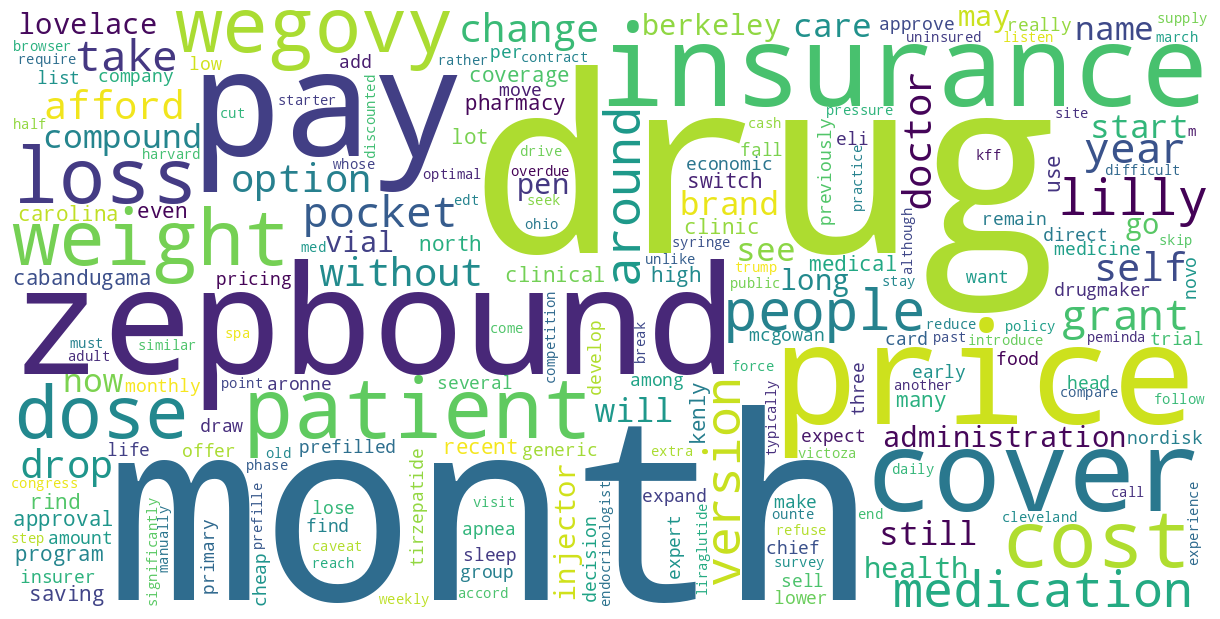

   Word cloud displayed (close the window to continue).
   Word cloud generation process completed.

7. Generating text summary...
   Generated summary:  Wegovy and Zepbound, which both sell for a list price of more than $1,000 a month, have long been out of reach for people without insurance or whose insurance refused to cover them . Drugmakers Novo Nordisk and Eli Lilly have introduced lower-cost options .
   File saved successfully: processed_articles/cost-weight-loss-drugs-wegovy-zepbound-how-low-pri_summary_specific.txt

6. Categorizing text (zero-shot)...
   Predicted category: medicine (Score: 0.4909)

8. Generating title...
   Generated title: Wegovy and Zepbound, which both sell for more than $1,000 a month, have long been out of reach for people without insurance
   File saved successfully: processed_articles/cost-weight-loss-drugs-wegovy-zepbound-how-low-pri_title_specific.txt

9. Extracting Named Entities (BERT with Post-processing)...
   Extracted 14 entities after post-pr

In [21]:
import requests
from bs4 import BeautifulSoup
import spacy
from functools import lru_cache
import os
import re
from transformers import pipeline # For zero-shot, summarization, text2text-generation, and NER

# --- Word Cloud & Display Imports (MODIFIED) ---
try:
    from wordcloud import WordCloud, STOPWORDS as WC_STOPWORDS
    import matplotlib.pyplot as plt
    WORDCLOUD_AVAILABLE = True
    print("WordCloud and Matplotlib loaded successfully.")
except ImportError:
    WORDCLOUD_AVAILABLE = False
    print("Warning: The 'wordcloud' or 'matplotlib' library is not installed. Word cloud generation and display will be unavailable.")
    print("You can install them by running: pip install wordcloud matplotlib")

try:
    from PIL import Image
    PIL_AVAILABLE = True
    print("Pillow (PIL) library loaded successfully.")
except ImportError:
    PIL_AVAILABLE = False
    # This warning is now primarily relevant if the user tries to use masking.
    # print("Warning: Pillow (PIL) library not found. Word cloud masking will not be available if attempted.")
    # print("You can install it by running: pip install Pillow")

try:
    import numpy as np
    NUMPY_AVAILABLE = True
    print("NumPy library loaded successfully.")
except ImportError:
    NUMPY_AVAILABLE = False
    # This warning is primarily relevant if the user tries to use masking.
    # print("Warning: NumPy library not found. Word cloud masking might not work as expected if attempted.")
    # print("You can install it by running: pip install numpy")


# --- Configuration ---
SPACY_MODEL_TO_LOAD = "en_core_web_trf"
REQUEST_HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
OUTPUT_DIR = "processed_articles"

# --- 1. Load English spaCy model ---
nlp_en = None
try:
    nlp_en = spacy.load(SPACY_MODEL_TO_LOAD, disable=["parser", "ner"])
    nlp_en.add_pipe("sentencizer")
    print(f"English spaCy model ({SPACY_MODEL_TO_LOAD}) loaded successfully.")
except OSError:
    print(f"ERROR: English spaCy model ({SPACY_MODEL_TO_LOAD}) not installed. Please install it with the command:")
    print(f"python -m spacy download {SPACY_MODEL_TO_LOAD}")
    print("The program will exit as the model is not installed.")
    exit()

# --- 2. Load Hugging Face Pipelines ---
zero_shot_classifier = None
summarizer_pipeline = None
title_generator_pipeline = None
ner_pipeline = None

try:
    print("Loading Zero-shot classification pipeline...")
    zero_shot_classifier = pipeline("zero-shot-classification",model="MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli")
    print("Zero-shot classification pipeline loaded successfully.")
except Exception as e:
    print(f"ERROR: Failed to load the zero-shot classification pipeline: {e}")
    print("Categorization will not be available.")

try:
    print("Loading Summarization pipeline...")
    summarizer_pipeline = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")
    print("Summarization pipeline loaded successfully.")
except Exception as e:
    print(f"ERROR: Failed to load the summarization pipeline: {e}")
    print("Summarization will not be available.")

try:
    print("Loading Text-to-Text Generation pipeline for titles...")
    title_generator_pipeline = pipeline("text2text-generation", model="t5-large")
    print("Text-to-Text Generation pipeline (for titles using t5-large) loaded successfully.")
except Exception as e:
    print(f"ERROR: Failed to load the Text-to-Text Generation pipeline (t5-large): {e}")
    print("Title generation will not be available.")

try:
    print("Loading NER pipeline (dslim/bert-base-NER)...")
    ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", tokenizer="dslim/bert-base-NER", aggregation_strategy="simple")
    print("NER pipeline (dslim/bert-base-NER) loaded successfully.")
except Exception as e:
    print(f"ERROR: Failed to load the NER pipeline (dslim/bert-base-NER): {e}")
    print("Named Entity Recognition will not be available.")


# --- Helper Functions ---
def fetch_html_content(url):
    """Fetches HTML content from the given URL."""
    try:
        if "news.google.com/read" in url:
            print(f"Warning: The URL '{url}' appears to be a Google News redirector. ")
            print("Attempting to fetch, but the content might be from the redirect page, not the final article.")
            print("For best results, try to use the direct article URL.")
        response = requests.get(url, headers=REQUEST_HEADERS, timeout=20, allow_redirects=True)
        response.raise_for_status()
        response.encoding = response.apparent_encoding if response.apparent_encoding else 'utf-8'
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error occurred while fetching URL '{url}': {e}")
        return None

def extract_text_from_html(html_string, main_content_selectors=None, selectors_to_exclude=None):
    """Extracts clean text from an HTML string."""
    if not html_string: return ""
    soup = BeautifulSoup(html_string, 'lxml')
    for element in soup(["script", "style"]): element.decompose()
    content_scope = soup
    if main_content_selectors:
        for selector in main_content_selectors:
            selected_block = soup.select_one(selector)
            if selected_block: content_scope = selected_block; break
    if selectors_to_exclude and content_scope:
        for selector in selectors_to_exclude:
            for element_to_remove in content_scope.select(selector): element_to_remove.decompose()
    if content_scope == soup:
        common_boilerplate_tags = ["header", "footer", "nav", "aside", "form", "figure", "figcaption"]
        for tag_name in common_boilerplate_tags:
            for tag in content_scope.find_all(tag_name): tag.decompose()
    text = content_scope.get_text(separator=' ', strip=True) if content_scope else ""
    return ' '.join(text.split())

# --- NLP Processing Functions ---
@lru_cache(maxsize=128)
def get_tokenized_text_spacy(text_to_process):
    if not nlp_en or not text_to_process: return ""
    doc = nlp_en(text_to_process)
    return " ".join([token.text for token in doc if not token.is_space])

@lru_cache(maxsize=128)
def get_lemmatized_text_spacy(text_to_process):
    if not nlp_en or not text_to_process: return [], ""
    doc = nlp_en(text_to_process)
    lemmas = []
    for token in doc:
        if not token.is_punct and not token.is_space and len(token.lemma_) > 0:
            lemma_to_add = token.lemma_.lower()
            if token.pos_ == "PRON" and token.lemma_ == "-PRON-": lemma_to_add = token.text.lower()
            if lemma_to_add and (token.is_alpha or token.like_num): lemmas.append(lemma_to_add)
    return lemmas, " ".join(lemmas)

# --- Categorization, Summarization, Title Generation, NER (EXISTING FUNCTIONS UNCHANGED) ---
def categorize_text_zero_shot(text_to_categorize, categories, classifier_pipeline):
    if not classifier_pipeline: print("Warning: Zero-shot classifier not loaded..."); return None
    if not text_to_categorize or not categories: print("Warning: No text or categories for categorization."); return None
    try:
        return classifier_pipeline(text_to_categorize[:2048], candidate_labels=categories, multi_label=False)
    except Exception as e: print(f"Error in categorization: {e}"); return None

def generate_summary_abstractive(text_to_summarize, summarizer):
    if not summarizer: print("Warning: Summarizer not loaded..."); return None
    if not text_to_summarize: print("Warning: No text for summarization."); return None
    try:
        summary = summarizer(text_to_summarize[:4000], max_length=150, min_length=40, do_sample=False)
        if summary and isinstance(summary, list) and summary[0] and 'summary_text' in summary[0]: return summary[0]['summary_text']
        print("Warning: Summarizer output format unexpected."); return None
    except Exception as e: print(f"Error in summarization: {e}"); return None

def generate_title_t5(text_to_get_title_from, title_generator, max_input_chars=2048):
    if not title_generator: print("Warning: Title generator not loaded..."); return None
    if not text_to_get_title_from: print("Warning: No text for title generation."); return None
    try:
        title_result = title_generator("generate headline: " + text_to_get_title_from[:max_input_chars], max_length=30, min_length=5, num_beams=4, early_stopping=True)
        if title_result and isinstance(title_result, list) and title_result[0] and 'generated_text' in title_result[0]: return title_result[0]['generated_text']
        print("Warning: Title generator output format unexpected."); return None
    except Exception as e: print(f"Error in title generation: {e}"); return None

def post_process_ner_entities(raw_entities_list, score_threshold=0.70):
    if not raw_entities_list: return []
    processed = [e for e in raw_entities_list if e['score'] >= score_threshold]
    # Basic merging (simplified)
    merged = []
    i = 0
    while i < len(processed):
        current = processed[i]
        if current['text'].startswith("##") and merged and merged[-1]['type'] == current['type'] and not merged[-1]['text'].endswith(" "):
            merged[-1]['text'] += current['text'].replace("##", "")
            merged[-1]['score'] = (merged[-1]['score'] + current['score']) / 2
        else:
            merged.append(dict(current))
        i += 1
    processed = merged
    # False positive filtering (simplified)
    known_fp = {("Man", "PER"), ("In", "ORG")}
    processed = [e for e in processed if (e['text'], e['type']) not in known_fp and not (len(e['text']) < 3 and e['type'] in ['ORG', 'PER'] and not any(c.isupper() for c in e['text']))]
    # Unique entities
    unique = { (e['text'].strip(), e['type']): e for e in processed }
    final_list = sorted(list(unique.values()), key=lambda x: x['score'], reverse=True)
    return final_list

def clean_common_boilerplate_phrases(text):
    unwanted_phrases = [
        "IE 11 is not supported.",
        "Internet Explorer is not supported.",
        "To continue using our site, please enable JavaScript in your browser settings.",
        "Please enable JavaScript to view the comments powered by Disqus.",
        "This website uses cookies to ensure you get the best experience on our website.",
        "We use cookies to enhance your Browse experience.",
        "By continuing to use this site you consent to the use of cookies.",
        "Log in to leave a comment.",
        "Sign up for our newsletter.",
        "Follow us on Facebook.", # és más közösségi média felhívások
        "Advertisement",
        "Read more:",
        "Related stories:",
        "Source:",
        "Photo by:",
        "Image credit:",
        "Click here to",
        # Esetleg dátum/idő formátumok, amik nem a cikk részei, de a scraper összeszedi
        # Rövid, értelmetlen sorok, amik pl. menüpontok maradékai lehetnek
        r"\b\d{1,2}\s+(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\b", # Pl. "15 May"
        r"Copyright © \d{4}", # Pl. "Copyright © 2025"
        r"All rights reserved\.",
        # További, általad tapasztalt zavaró elemek
    ]

    # Egyszerű szövegcserék
    for phrase in unwanted_phrases:
        # Használhatsz re.IGNORECASE-t is, ha a kis/nagybetű nem számít
        text = re.sub(re.escape(phrase), "", text, flags=re.IGNORECASE)

    # Specifikusabb reguláris kifejezések (példa)
    # Pl. "XYZ is not supported" általánosítása:
    text = re.sub(r"[a-zA-Z0-9\s]+ is not supported\.?", "", text, flags=re.IGNORECASE)
    text = re.sub(r"Please enable JavaScript.*?\.", "", text, flags=re.IGNORECASE | re.DOTALL)
    text = re.sub(r"This site uses cookies.*?\.", "", text, flags=re.IGNORECASE | re.DOTALL)


    # Felesleges szóközök eltávolítása, amik a cserék után maradtak
    text = ' '.join(text.split())
    return text

def extract_named_entities_bert(text_to_process, ner_model_pipeline, max_chars=4000):
    if not ner_model_pipeline: print("Warning: NER pipeline not loaded..."); return None, ""
    if not text_to_process: print("Warning: No text for NER."); return [], ""
    try:
        entities_raw = ner_model_pipeline(text_to_process[:max_chars])
        formatted = [{"text": e['word'], "type": e['entity_group'], "score": float(e['score'])} for e in entities_raw]
        processed_list = post_process_ner_entities(formatted)
        str_output = "\n".join([f"Entity: {e['text']}, Type: {e['type']} (Score: {e['score']:.4f})" for e in processed_list])
        return processed_list, str_output
    except Exception as e: print(f"Error in NER: {e}"); return None, ""


# --- Word Cloud Generation Function (MODIFIED) ---
def generate_and_save_wordcloud(text_for_cloud, filepath,
                                width=1200, height=600, background_color='white',
                                custom_stopwords=None,
                                display_cloud=False,
                                mask_image_path=None,
                                colormap_wc='viridis', # Default Matplotlib colormap
                                font_path_wc=None,
                                contour_width_wc=0,
                                contour_color_wc='black'):
    """
    Generates a word cloud, saves it, and optionally displays it.
    """
    if not WORDCLOUD_AVAILABLE:
        print("   Skipping word cloud: 'wordcloud' or 'matplotlib' library not available.")
        return False
    if not text_for_cloud or not text_for_cloud.strip():
        print("   Warning: No meaningful text provided for word cloud generation.")
        return False

    mask_array = None
    if mask_image_path:
        if PIL_AVAILABLE and NUMPY_AVAILABLE:
            try:
                mask_image = Image.open(mask_image_path).convert("RGBA") # Ensure alpha for transparent parts
                mask_array = np.array(mask_image)
                # For typical masks, white areas should be transparent.
                # WordCloud expects 0 for transparent in the mask array if it's binary.
                # If the mask is an alpha channel, 0 means transparent.
                # If it's a shape on white background, we might need to process it
                # so the shape is non-zero and background is zero.
                # Assuming mask_array has shape as non-zero and background as zero or transparent.
                print(f"   Using mask image: {mask_image_path}")
            except FileNotFoundError:
                print(f"   ERROR: Mask image not found at '{mask_image_path}'. Proceeding without mask.")
            except Exception as e:
                print(f"   ERROR: Could not load or process mask image: {e}. Proceeding without mask.")
        else:
            print("   Warning: Pillow or NumPy not available. Cannot use mask image.")
            if not PIL_AVAILABLE: print("   (Pillow is missing)")
            if not NUMPY_AVAILABLE: print("   (NumPy is missing)")


    stopwords_set = WC_STOPWORDS.copy()
    if custom_stopwords:
        stopwords_set.update(custom_stopwords)
    additional_common_words = {
        "ref", "fig", "figure", "table", "image", "photo", "chart", "advertisement",
        "subscribe", "login", "text", "content", "article", "page", "view", "read", "more",
        "say", "said", "also", "would", "could", "should", "told", "new", "like", "one", "two", "time"
    } # Added more common words
    stopwords_set.update(additional_common_words)

    try:
        wc_params = {
            'width': width,
            'height': height,
            'background_color': background_color,
            'stopwords': stopwords_set,
            'min_font_size': 10,
            'collocations': False,
            'prefer_horizontal': 0.95, # Slightly more horizontal
            'max_words': 200, # Increased max_words
            'mask': mask_array,
            'font_path': font_path_wc,
            'colormap': colormap_wc,
            'contour_width': contour_width_wc if mask_array is not None else 0,
            'contour_color': contour_color_wc if mask_array is not None else background_color,
        }
        # Filter out None parameters that WordCloud might not handle well if explicitly set to None
        # (though 'mask' and 'font_path' are usually fine with None)
        final_wc_params = {k: v for k, v in wc_params.items() if k == 'mask' or v is not None}


        wordcloud_generator = WordCloud(**final_wc_params).generate(text_for_cloud)

        os.makedirs(os.path.dirname(filepath), exist_ok=True)
        wordcloud_generator.to_file(filepath)
        print(f"   Word cloud saved successfully: {filepath}")

        if display_cloud:
            plt.figure(figsize=(max(10, int(width/100)), max(5, int(height/100)))) # Dynamic figure size
            plt.imshow(wordcloud_generator, interpolation='bilinear')
            plt.axis("off")
            plt.tight_layout(pad=0) # Remove padding for a cleaner look
            plt.show() # This will block execution until the window is closed
            print("   Word cloud displayed (close the window to continue).")
        return True

    except Exception as e:
        print(f"   Error occurred during word cloud generation or display: {e}")
        return False

# --- File Handling Functions ---
def save_text_to_file(text_content, filepath):
    try:
        os.makedirs(os.path.dirname(filepath), exist_ok=True)
        with open(filepath, "w", encoding="utf-8") as f: f.write(text_content)
        print(f"   File saved successfully: {filepath}")
    except IOError as e: print(f"   Error writing file ({filepath}): {e}")

def generate_safe_filename(url_or_title, suffix=""):
    if not url_or_title: base_name = f"article_{suffix}"
    else:
        name_part = url_or_title.split('/')[-1] if '/' in url_or_title else url_or_title
        name_part = name_part.split('?')[0]
        safe_name = re.sub(r'[^a-zA-Z0-9_-]+', '_', name_part).strip('_')[:50]
        base_name = f"{safe_name}_{suffix}" if safe_name else f"article_{suffix}"
    # Default to .txt, will be changed for .png by the caller
    return os.path.join(OUTPUT_DIR, f"{base_name}.txt" if not suffix.endswith((".png", ".jpg")) else base_name)


# --- Main Processing Function ---
def process_article_url(article_url, main_content_selectors=None, selectors_to_exclude=None):
    if not nlp_en: print("spaCy model not available...")

    print(f"Processing started: {article_url}")
    if not os.path.exists(OUTPUT_DIR):
        try: os.makedirs(OUTPUT_DIR); print(f"Output directory created: {OUTPUT_DIR}")
        except OSError as e: print(f"Error creating output directory ({OUTPUT_DIR}): {e}"); return

    print(f"\n1. Fetching HTML content...")
    html_code = fetch_html_content(article_url)
    if not html_code: print("   Failed to download HTML. Processing stopped."); return

# 2. Extract Text & Initial Clean (HTML-től való tisztítás, majd tartalmi zaj szűrése)
    print("\n2. Extracting and cleaning text from HTML...")
    # Először kinyerjük a szöveget a HTML-ből
    raw_extracted_text = extract_text_from_html(html_code, main_content_selectors, selectors_to_exclude)

    if not raw_extracted_text: # Ellenőrizzük, sikerült-e szöveget kinyerni
        print("   Failed to extract any text from HTML. Processing stopped.")
        return

    # Opcionális: Itt elmentheted a teljesen "nyers", csak HTML-től tisztított szöveget, ha szükséged van rá diagnosztikához
    # print(f"   Raw extracted text (before boilerplate phrase cleaning, first 200 chars): '{raw_extracted_text[:200]}...'")
    # save_text_to_file(raw_extracted_text, generate_safe_filename(article_url, "raw_extracted.txt"))

    # Most alkalmazzuk a tartalmi zajszűrőt (pl. "IE 11 is not supported" és hasonlók eltávolítása)
    print("   Applying general boilerplate phrase cleaning...")
    raw_cleaned_text = clean_common_boilerplate_phrases(raw_extracted_text) # Itt használjuk a korábban definiált függvényt

    if not raw_cleaned_text: # Ellenőrizzük, hogy a tisztítás után maradt-e értelmes szöveg
        print("   Text became empty after boilerplate phrase cleaning. Processing stopped.")
        return

    # Kiírjuk és elmentjük a véglegesen megtisztított szöveget, amit a további NLP lépésekhez használunk
    print(f"   Final cleaned text (first 300 chars): '{raw_cleaned_text[:300]}...'")
    save_text_to_file(raw_cleaned_text, generate_safe_filename(article_url, "cleaned_text.txt")) # A fájlnév itt már "cleaned_text.txt"

    # A címkefelhőhöz használt szöveg előkészítése:
    # Alapértelmezetten a (tartalmi zajtól is) megtisztított nyers szöveget használjuk.
    # Ezt később felülírjuk a lemmatizált szöveggel, ha a lemmatizálás sikeres.
    text_for_cloud = raw_cleaned_text
    lemmatized_text_string = None # Ezt a változót a lemmatizálási lépésben töltjük fel, ha sikeres

    if nlp_en:
        print("\n3. Tokenizing text with spaCy...")
        tokenized_text = get_tokenized_text_spacy(raw_cleaned_text)
        if tokenized_text: save_text_to_file(tokenized_text, generate_safe_filename(article_url, "tokenized_specific"))
        else: print("   Failed to tokenize text.")

        print("\n4. Lemmatizing text with spaCy...")
        _, lemmatized_text_string = get_lemmatized_text_spacy(raw_cleaned_text)
        if lemmatized_text_string:
            lemmatized_text_string_for_cloud = lemmatized_text_string
            save_text_to_file(lemmatized_text_string, generate_safe_filename(article_url, "lemmatized_specific"))
        else: print("   Failed to lemmatize text.")
    else:
        print("\nWarning: spaCy model not loaded, skipping tokenization and lemmatization. Using raw text for word cloud.")

    # --- 5. Generate and Save Word Cloud (MODIFIED STEP) ---
    print("\n5. Generating Word Cloud...")
    if WORDCLOUD_AVAILABLE:
        if lemmatized_text_string_for_cloud:
            # Ensure the suffix for the image file is correct
            base_fn_wc = generate_safe_filename(article_url, "wordcloud_specific").replace(".txt", "")
            wordcloud_output_filepath = f"{base_fn_wc}.png"

            # --- Word Cloud Customization Options (Examples) ---
            # Set to True to display the cloud in a window
            display_option = True # VÁLTOZTASD MEG True-ra A MEGJELENÍTÉSHEZ

            # Maszk kép elérési útja (cseréld ki a sajátodra, vagy hagyd None-on)
            # Készíts egy PNG képet (pl. egy alakzat sziluettjét).
            # A fehér (#FFFFFF) részek lesznek átlátszóak; más színek adják az alakzatot.
            # example_mask_path = "mask_images/twitter_mask.png" # Példa elérési út
            example_mask_path = None # Hagyd None-on, ha nem akarsz maszkot

            # Színséma (valassz a matplotlib colormap-ek közül, vagy hagyd az alapértelmezettet)
            # Példák: 'viridis', 'plasma', 'magma', 'inferno', 'cividis', 'Blues', 'Reds', 'ocean', 'terrain'
            # chosen_colormap = 'ocean'
            chosen_colormap = None # None esetén a WordCloud alapértelmezett színeit használja (ami általában változatos)

            # Egyedi betűtípus elérési útja (.ttf vagy .otf)
            # example_font_path = "fonts/Roboto-Regular.ttf" # Példa elérési út
            example_font_path = None # Hagyd None-on az alapértelmezett betűtípushoz

            # Kontúr maszkolt képhez (ha használsz maszkot)
            contour_w = 1 if example_mask_path else 0
            contour_c = 'grey'

            print(f"   Attempting to generate word cloud with display: {display_option}, mask: {example_mask_path}, colormap: {chosen_colormap}")

            if generate_and_save_wordcloud(lemmatized_text_string_for_cloud,
                                           wordcloud_output_filepath,
                                           display_cloud=display_option,
                                           mask_image_path=example_mask_path,
                                           colormap_wc=chosen_colormap,
                                           font_path_wc=example_font_path,
                                           contour_width_wc=contour_w,
                                           contour_color_wc=contour_c,
                                           background_color='white' # Lehet 'black' is pl. sötét témához
                                           ):
                print(f"   Word cloud generation process completed.")
            else:
                print("   Word cloud generation failed or was skipped due to issues.")
        else:
            print("   No text available for word cloud generation.")
    else:
        print("   Word cloud generation skipped because 'wordcloud' library is not available.")


    print("\n7. Generating text summary...")
    if raw_cleaned_text and summarizer_pipeline:
      article_summary = generate_summary_abstractive(raw_cleaned_text, summarizer_pipeline)
      if article_summary:
        print(f"   Generated summary: {article_summary}")
        save_text_to_file(article_summary, generate_safe_filename(article_url, "summary_specific"))
      else: print("   Failed to generate summary.")
    # ...

    # Adjust subsequent step numbers if necessary (they seem fine as they are)

    print("\n6. Categorizing text (zero-shot)...")
    # ... (rest of the processing steps: Categorization, Summarization, Title, NER) ...
    if raw_cleaned_text and zero_shot_classifier:
        # ... (categorization code)
        candidate_article_categories = [
            "sport", "football", "politics", "business", "finance", "technology", "science",
            "health", "medicine", "education", "music", "movie","world news", "culture", "art", "travel", "food", "lifestyle", "environment",
            "social issues", "mental health", "entertainment"
        ]
        category_results = categorize_text_zero_shot(article_summary, candidate_article_categories, zero_shot_classifier)
        if category_results and category_results['labels'] and category_results['scores']:
            print(f"   Predicted category: {category_results['labels'][0]} (Score: {category_results['scores'][0]:.4f})")
        else: print("   Could not determine a clear category.")
    # ...

    print("\n8. Generating title...")
    if raw_cleaned_text and title_generator_pipeline:
        generated_raw_title = generate_title_t5(article_summary, title_generator_pipeline)
        if generated_raw_title:
            processed_title = generated_raw_title.strip()
            # Further processing if needed (e.g., taking first sentence, capitalizing)
            first_period = processed_title.find('.')
            if first_period != -1: processed_title = processed_title[:first_period+1]
            if processed_title: processed_title = processed_title[0].upper() + processed_title[1:]
            print(f"   Generated title: {processed_title}")
            save_text_to_file(processed_title, generate_safe_filename(article_url, "title_specific"))
        else: print("   Failed to generate title.")
    # ...

    print("\n9. Extracting Named Entities (BERT with Post-processing)...")
    if raw_cleaned_text and ner_pipeline:
        processed_entities_list, processed_entities_string = extract_named_entities_bert(raw_cleaned_text, ner_pipeline)
        if processed_entities_list is not None:
            if processed_entities_list:
                print(f"   Extracted {len(processed_entities_list)} entities after post-processing (showing up to 10):")
                for entity in processed_entities_list[:10]: print(f"     - {entity['text']} ({entity['type']}, Score: {entity['score']:.3f})")
                if len(processed_entities_list) > 10: print(f"     ... and {len(processed_entities_list) - 10} more.")
                save_text_to_file(processed_entities_string, generate_safe_filename(article_url, "entities_processed_specific"))
            else: print("   No entities found after post-processing.")
        else: print("   Failed to extract entities or an error occurred.")
    # ...

    print(f"\nProcessing finished for: {article_url}")


# --- Main execution block ---
if __name__ == "__main__":
    # Initial checks for loaded models/libraries
    if not nlp_en: print("Warning: spaCy model did not load. Tokenization/lemmatization will be skipped.")
    if not zero_shot_classifier: print("Warning: Zero-shot classification pipeline did not load.")
    # ... other checks ...
    if not WORDCLOUD_AVAILABLE: print("Warning: WordCloud/Matplotlib not available. Word cloud functionality limited.")
    if PIL_AVAILABLE == False : print("Warning: Pillow (PIL) library not loaded. Word cloud masking will be unavailable.") # More direct warning
    if NUMPY_AVAILABLE == False : print("Warning: NumPy library not loaded. Word cloud masking may be affected.") # More direct warning


    url_to_process = "https://www.nbcnews.com/health/health-news/cost-weight-loss-drugs-wegovy-zepbound-how-low-prices-down-rcna205911"
    # url_to_process = "https://www.reuters.com/world/europe/putin-xi-map-out-new-era-press-conference-after-kremlin-talks-2023-03-21/"
    # url_to_process = "https://edition.cnn.com/2024/03/17/tech/spacex-starship-launch-what-next/index.html"

    # Hívd meg a feldolgozást az URL-lel (és opcionális szelektorokkal, ha szükséges)
    process_article_url(url_to_process)

    # Példa egy másik URL feldolgozására, esetleg eltérő szelektorokkal:
    # url_reuters = "https://www.reuters.com/technology/musk-says-xaitests-grok-chatbot-with-more-users-after-political-bias-concerns-2024-03-15/"
    # main_selectors_reuters = ['article[data-testid="ArticlePage-article-body"]']
    # exclude_selectors_reuters = ['div[data-testid="Paywall-Container"]', 'div[data-testid="AdditionalCoverage-Container"]']
    # process_article_url(url_reuters, main_selectors_reuters, exclude_selectors_reuters)